In [2]:
import pandas as pd
import numpy as np
import sklearn as sc

In [3]:
from sklearn.metrics import log_loss as lg
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import recall_score as rec
from sklearn.metrics import precision_score as pre
from sklearn.metrics import accuracy_score

In [4]:
accuracy = []
model = []

In [5]:
df_train = pd.read_csv("phishing_data_small.csv")
df_test = pd.read_csv("phishing_data_large.csv")
print(df_train.shape)
print(df_test.shape)

(58645, 112)
(88647, 112)


In [6]:
X_train = df_train.iloc[:, 0:111]
X_train.shape

(58645, 111)

In [7]:
Y_train = df_train.iloc[:, 111:112]
Y_train.shape

(58645, 1)

In [8]:
X_test = df_test.iloc[:, 0:111]
X_test.shape

(88647, 111)

In [9]:
Y_test = df_test.iloc[:, 111:112]
Y_test.shape

(88647, 1)

In [9]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
print("X_train.shape: "+str(X_train.shape))
print("Y_train.shape: "+str(Y_train.shape))
print("X_test.shape: "+str(X_test.shape))
print("Y_test.shape: "+str(Y_test.shape))

X_train.shape: (58645, 111)
Y_train.shape: (58645, 1)
X_test.shape: (88647, 111)
Y_test.shape: (88647, 1)


## KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [12]:
KNN_Model = knn(n_neighbors=5, leaf_size=300)

In [13]:
KNN_Model.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=300, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
Y_pred = KNN_Model.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [15]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [16]:
cnf = conf(Y_test, Y_pred)
cnf

array([[48647,  9353],
       [ 2622, 28025]], dtype=int64)

In [17]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.8493152889306096
Recall Score: 0.8765932563011737
Accuracy Score: 0.8649136462598848


In [18]:
model.append("KNN")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [19]:
# acc = lg(Y_train, Y_pred)
# print("The ACCURACY is: "+str(acc))

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression as lr

In [20]:
Logistic = lr(penalty="l2", max_iter=15000)

In [21]:
Logistic.fit(X_train, Y_train.values.ravel())

C:\Users\ROHIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=15000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
Y_pred = Logistic.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [23]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [24]:
cnf = conf(Y_test, Y_pred)
cnf

array([[53883,  4117],
       [ 2722, 27925]], dtype=int64)

In [25]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9117123826100053
Recall Score: 0.9200997062771514
Accuracy Score: 0.9228513091249563


In [26]:
model.append("Logistic Reg")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [28]:
# acc = lg(Y_test, Y_pred)
# print("The ACCURACY is: "+str(acc))

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier as dec

In [28]:
decision = dec()

In [29]:
decision.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
Y_pred = decision.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [31]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [32]:
cnf = conf(Y_test, Y_pred)
cnf

array([[57249,   751],
       [    6, 30641]], dtype=int64)

In [33]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9879859565501403
Recall Score: 0.9934279732054552
Accuracy Score: 0.9914605119180571


In [34]:
model.append("Decision Tree")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier as rand

In [36]:
rf = rand(n_estimators=250)

In [37]:
rf.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
Y_pred = rf.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [39]:
cnf = conf(Y_test, Y_pred)
cnf

array([[57875,   125],
       [    4, 30643]], dtype=int64)

In [40]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9979341138995688
Recall Score: 0.9988571545507632
Accuracy Score: 0.9985447900098142


In [41]:
model.append("Random Forest")
accuracy.append(accuracy_score(Y_test, Y_pred))

## MultiLayer Perceptron

In [42]:
from sklearn.neural_network import MLPClassifier as mlp

In [43]:
percep = mlp(hidden_layer_sizes=(60, 45, ), alpha=0.0001, learning_rate_init=0.001)

In [44]:
percep.fit(X_train, Y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 45), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
Y_pred = percep.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [46]:
cnf = conf(Y_test, Y_pred)
cnf

array([[51822,  6178],
       [ 1077, 29570]], dtype=int64)

In [47]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9034097948892339
Recall Score: 0.929170328310247
Accuracy Score: 0.9181585389240471


In [48]:
model.append("M-Perceptron")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Boosting Algorithms

In [49]:
from sklearn.ensemble import GradientBoostingClassifier as gbclassifier

In [50]:
gbc = gbclassifier()

In [51]:
gbc.fit(X_train, Y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [52]:
Y_pred = gbc.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [53]:
cnf = conf(Y_test, Y_pred)
cnf

array([[55946,  2054],
       [ 1816, 28831]], dtype=int64)

In [54]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9510279348129458
Recall Score: 0.9526654074258267
Accuracy Score: 0.9563437002944262


In [55]:
model.append("Gradient Boosting")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [60]:
# Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier as abclassifier

In [57]:
abc = abclassifier()

In [58]:
abc.fit(X_train, Y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [59]:
Y_pred = abc.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [60]:
cnf = conf(Y_test, Y_pred)
cnf

array([[55091,  2909],
       [ 2607, 28040]], dtype=int64)

In [61]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9304115571105671
Recall Score: 0.9323897025978805
Accuracy Score: 0.9377756720475594


In [62]:
model.append("AdaBoost")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Comparision Of Accuracies

In [63]:
print(model)
print(accuracy)

['KNN', 'Logistic Reg', 'Decision Tree', 'Random Forest', 'M-Perceptron', 'Gradient Boosting', 'AdaBoost']
[0.8649136462598848, 0.9228513091249563, 0.9914605119180571, 0.9985447900098142, 0.9181585389240471, 0.9563437002944262, 0.9377756720475594]


In [64]:
import matplotlib.pyplot as plt

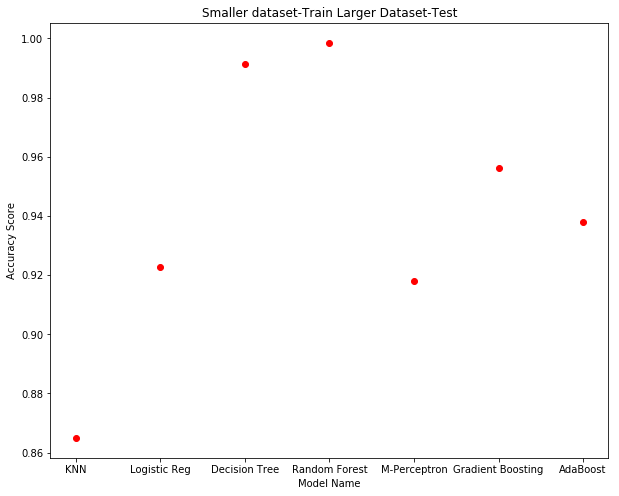

In [65]:
plt.figure(figsize=(10,8))
plt.title("Smaller dataset-Train Larger Dataset-Test")
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.plot(model, accuracy, "or")